In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('/import/mdd.rna/GSE80655.rda')

In [3]:
ls()

[1] "cliinfo" "expr3"

In [4]:
run_count_to_tpm = function(count,hg_len){
    count = read.table(count,header =T,sep = '\t')
    colnames(count)[1] = 'Gene'
    count = count[!duplicated(count$Gene),]
    ## count 转tpm
    len = read.table(hg_len,header =T,sep = '\t')
    library(tidyverse)
    library(dplyr)
    merge<-left_join(count,len,by="Gene")#根据基因那列进行合并
    merge <- na.omit(merge)#删除错误值行
    rownames(merge)<-merge[,1]
    merge<-merge[,-1]
    head(merge)#最后一列Length是基因长度
    kb <- merge$Length /1000
    dim(merge)
    countdata <- merge[,1:dim(merge)[2]-1]
    rpk <- countdata /kb
    tpm <- t(t(rpk)/colSums(rpk) * 1000000)
    write.table(tpm,file = 'bulk1.rna-tpm.txt',quote =F,row.names = T,sep = '\t')

    
}
count = './bulk1.count.txt'
hg_len = './All_hg19gene_len.txt'
run_count_to_tpm(count,hg_len)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.3     v purrr   1.0.1
v tibble  3.2.1     v dplyr   1.1.2
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.4     v forcats 1.0.0
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::

In [5]:
expr3 = read.table('./bulk1.rna-tpm.txt',header =T,sep = '\t')

In [6]:
head(expr3,3)

,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,SL32249,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,2.8895334,5.7704514,3.6716700,6.5382604,4.515484,5.2767361,5.5228906,6.9073387,4.3866608,4.9281753,...,7.1491687,7.3098581,8.5307215,9.34668615,6.4297467,6.381955,5.280047,5.5190133,6.879841,3.9895762
TNMD,0.3212823,0.2500621,0.2983341,0.2505684,0.000000,0.4608792,0.4148457,0.5895874,0.3564293,0.4174898,...,0.4959991,0.4271824,0.6386467,0.06328718,0.3043886,0.453952,0.206565,0.2159138,0.520628,0.4281036
DPM1,61.5689037,63.2085265,47.6205893,44.7867652,45.931795,66.3940915,60.8692405,52.6916306,51.3470793,58.3335696,...,64.8374028,69.5171183,54.0944863,55.04044623,50.3464216,54.012391,48.769527,53.1847932,39.043986,42.6853336


In [7]:
library(dplyr)

In [8]:
expr3 = expr3 %>%  t() %>% as.data.frame() %>% tibble::rownames_to_column(.,'sample')

In [9]:
dim(expr3)

[1]    47 29008

In [10]:
head(expr3,3)

,sample,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,SNURF,ZBTB8B,C1QTNF3-AMACR,DGCR11,RBAKDN,OR6L2P,CYP4F36P,OR7M1P,LINC01396,OR13I1P
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SL32230,2.889533,0.3212823,61.56890,4.433910,1.069146,5.955838,13.654005,9.50695,12.20377,...,5.722926,1.9346031,0.05035675,4.594792,0.0000000,2.050418,0,0.9704775,1.9630531,0.4092282
2,SL32231,5.770451,0.2500621,63.20853,6.404866,1.349422,10.835664,7.439078,10.88303,20.64615,...,5.482212,1.8508179,0.17637264,5.818970,0.0000000,1.958594,0,0.7553470,0.0000000,0.1592563
3,SL32242,3.671670,0.2983341,47.62059,5.163959,1.180604,9.586081,5.484294,13.75777,24.51818,...,2.725208,0.7984092,0.09351986,3.760394,0.3114903,2.077051,0,1.2015459,0.3038064,0.0000000


In [11]:
dd = merge(cliinfo,expr3,by.x = 'V1',by.y = 'sample')

In [12]:
rownames(dd) = dd[,1]

In [13]:
head(dd,2)

,V1,V2,V3,V4,V5,V6,TSPAN6,TNMD,DPM1,SCYL3,...,SNURF,ZBTB8B,C1QTNF3-AMACR,DGCR11,RBAKDN,OR6L2P,CYP4F36P,OR7M1P,LINC01396,OR13I1P
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SL32230,SL32230,48,MD,F,X3004,DLPFC,2.889533,0.3212823,61.56890,4.433910,...,5.722926,1.934603,0.05035675,4.594792,0,2.050418,0,0.9704775,1.963053,0.4092282
SL32231,SL32231,46,MD,M,X3064,DLPFC,5.770451,0.2500621,63.20853,6.404866,...,5.482212,1.850818,0.17637264,5.818970,0,1.958594,0,0.7553470,0.000000,0.1592563


In [14]:
model.gene = c('RPE65' ,'DRD3', 'MC3R','RELB',  'PRF1')

In [15]:
expr = dd[,c('V3',model.gene)]

In [16]:
colnames(expr)[1] = 'Group'

In [17]:
expr[expr$Group =='MD',]$Group<-1
expr[expr$Group =='Control',]$Group<-0
expr$Group = as.numeric(expr$Group)

In [18]:
fit.reduce<-glm(Group~RPE65 + DRD3+ MC3R+RELB  + PRF1 ,data=expr,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, family = binomial(), 
    data = expr)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.64343  -0.91436  -0.07783   0.73931   1.89488  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   5.6056     2.2789   2.460  0.01390 * 
RPE65        -0.6124     0.8578  -0.714  0.47527   
DRD3         -0.4402     1.5758  -0.279  0.77995   
MC3R          0.6471     1.2938   0.500  0.61698   
RELB         -0.3176     0.1586  -2.002  0.04524 * 
PRF1         -1.1998     0.4292  -2.795  0.00519 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 48.126  on 41  degrees of freedom
AIC: 60.126

Number of Fisher Scoring iterations: 5


Waiting for profiling to be done...

Loading required package: grid

Loading required package: checkmate

Warning message:
"package 'checkmate' was built under R version 4.2.3"
Loading required package: abind

Warning message:
"package 'abind' was built under R version 4.2.3"


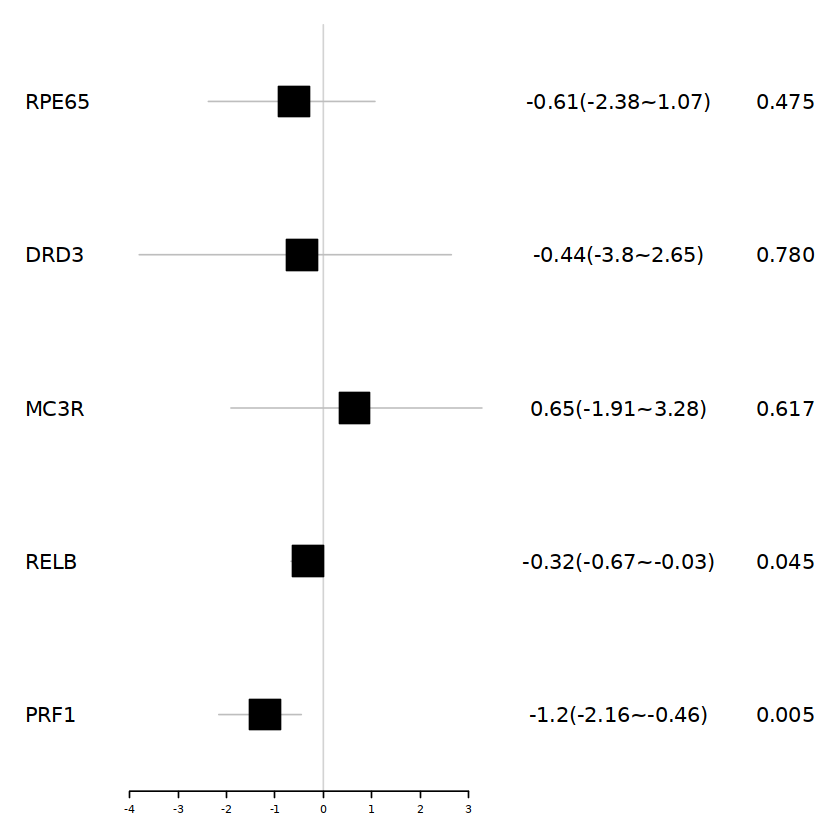

In [19]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example3.csv",
          quote = F,row.names = F)

library(forestplot)
fp<-read.csv("forestplot_example3.csv",header=T)

forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           graph.pos=2)

In [20]:
summary(fit.reduce) #查看构建的模型
fitted.prob<-predict(fit.reduce, newdata = expr, type = "response")  #这里不需要变动
expr$pred<-fit.reduce$fitted.values
m<-pROC::roc(expr$Group,expr[,"pred"])  #这里要把Y改为自己的结局变量即可


Call:
glm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, family = binomial(), 
    data = expr)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.64343  -0.91436  -0.07783   0.73931   1.89488  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   5.6056     2.2789   2.460  0.01390 * 
RPE65        -0.6124     0.8578  -0.714  0.47527   
DRD3         -0.4402     1.5758  -0.279  0.77995   
MC3R          0.6471     1.2938   0.500  0.61698   
RELB         -0.3176     0.1586  -2.002  0.04524 * 
PRF1         -1.1998     0.4292  -2.795  0.00519 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 48.126  on 41  degrees of freedom
AIC: 60.126

Number of Fisher Scoring iterations: 5


Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [21]:
library(ggplot2)

In [22]:
expr3 = expr

Area under the curve: 0.8207

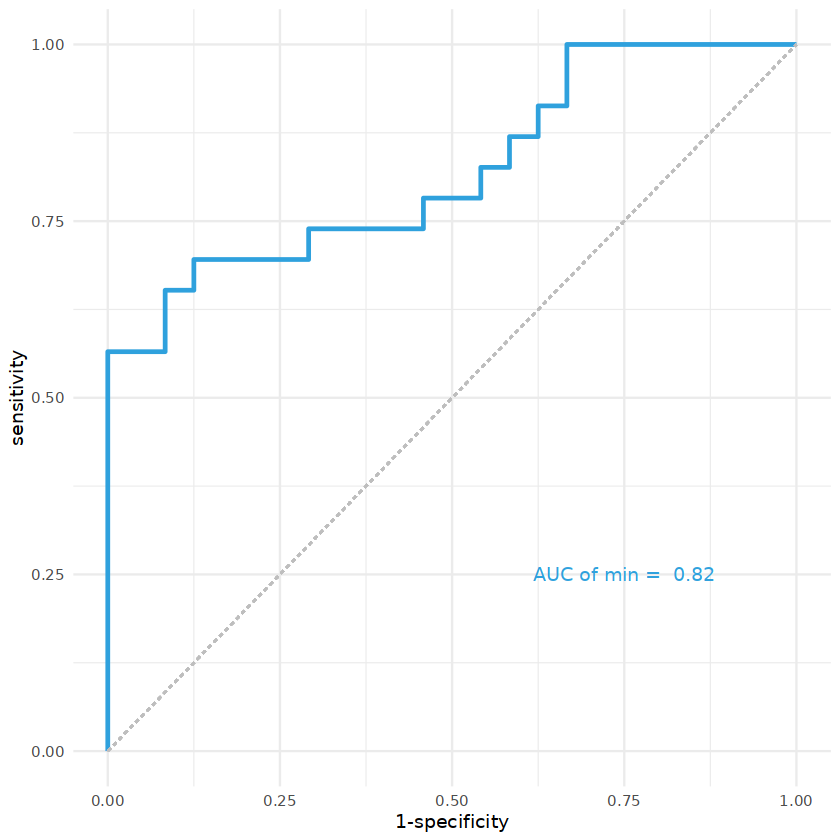

In [23]:
g <- pROC::ggroc(m,legacy.axes = T,size = 1,color = "#2fa1dd")
pROC::auc(m)  # Area under the curve: 0.9953

g + theme_minimal() +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), 
               colour = "grey", linetype = "dashed")+
  annotate("text",x = .75, y = .25,
           label = paste("AUC of min = ",format(round(as.numeric(pROC::auc(m)),2),nsmall = 2)),color = "#2fa1dd")

In [24]:
library(ROCR)
library(rms)

Warning message:
"package 'ROCR' was built under R version 4.2.3"
Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units




In [25]:
expr3$Group = as.factor(expr3$Group)

In [26]:
dd<-rms::datadist(expr3)  #开始打包数据
options(datadist="dd")

In [27]:
formula1<-as.formula(Group~. )  #RPE65 + MC3R+NFIL3 + PRF1 + IL6
fit1<-lrm(formula1,data = expr3,x=T,y=T)

In [28]:
# nom1 <- rms::nomogram(fit1, fun=plogis,
#                 #fun.at=c(0.001,0.1,0.25,0.5,0.75,0.9,0.99),
#                  #lp=T, # 是否显示线性概率
#                  funlabel="Risk of Death")  
# plot(nom1) 

In [29]:
nmfinput = expr %>% dplyr::filter(Group == 1)

In [30]:
nmfinput = nmfinput[,-1] %>% t() %>%  as.data.frame()

In [31]:
library(NMF)

Loading required package: registry

Warning message:
"package 'registry' was built under R version 4.2.3"
Loading required package: rngtools

Warning message:
"package 'rngtools' was built under R version 4.2.3"
Loading required package: cluster

Warning message:
"package 'cluster' was built under R version 4.2.3"
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [32]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 9 rows containing missing values (`geom_point()`)."


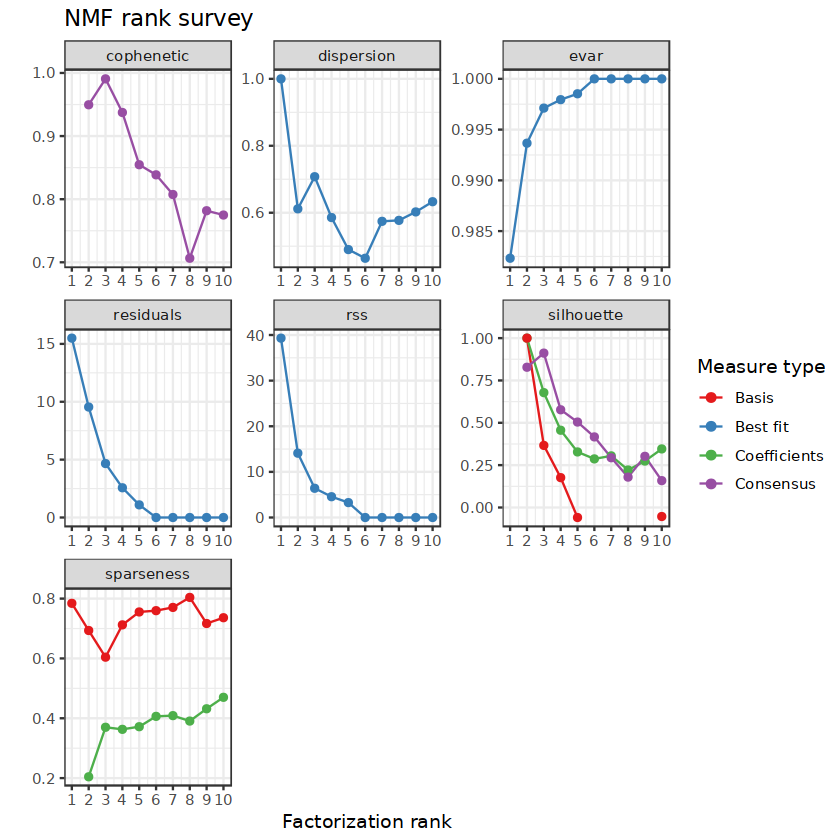

In [33]:
plot(estim.coad)

In [34]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
13 10 

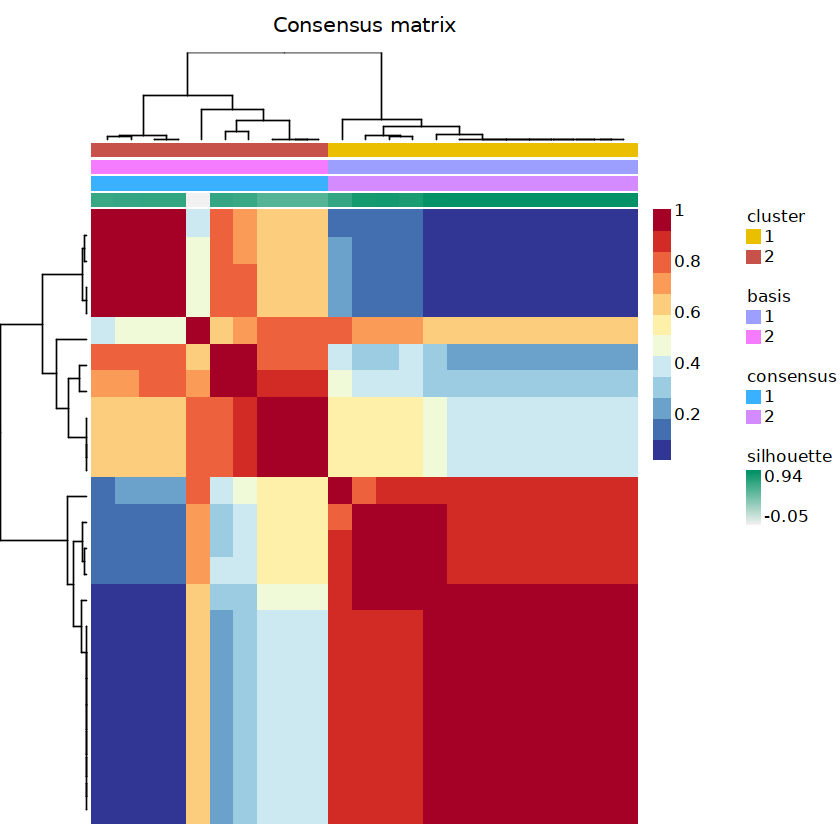

In [35]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [36]:
library(tinyarray)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree




Attaching package: 'tinyarray'


The following object is masked from 'package:dplyr':

    union_all




In [37]:
expr3 = read.table('./bulk1.rna-tpm.txt',header =T,sep = '\t')

In [38]:
a = expr3[,colnames(nmfinput)]

In [39]:
cg=names(tail(sort(apply(a,1,sd)),15000))
n=a[cg,]

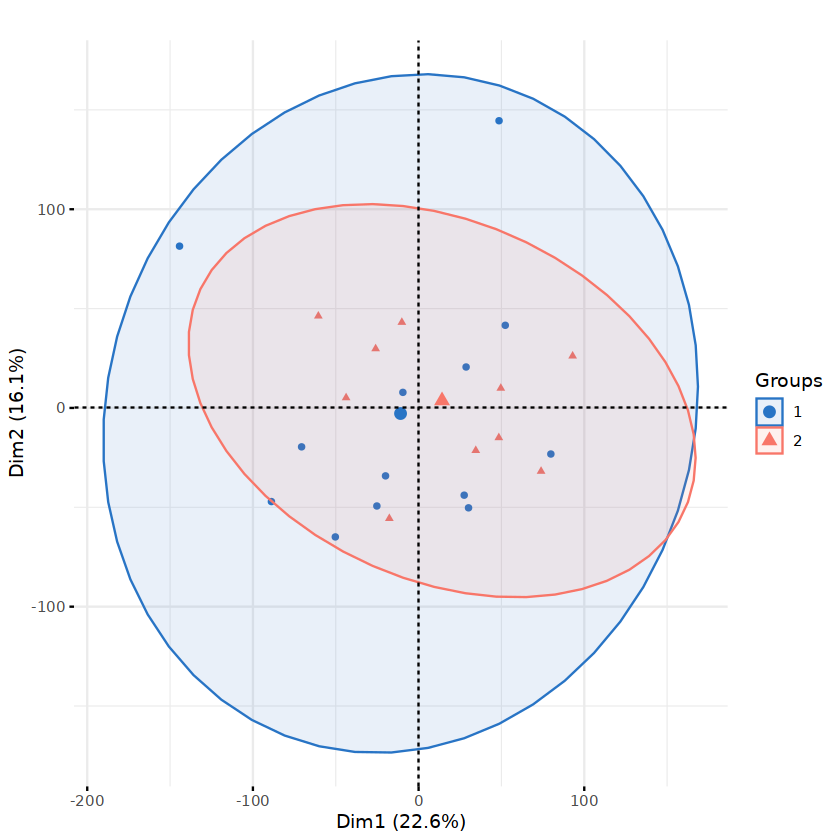

In [40]:
draw_pca(n,group)

In [41]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 5)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
SL32230,5.4361261,11.549882,1
SL32231,4.5728665,4.465455,2
SL32245,0.7162434,4.990715,2
SL32246,2.8205250,10.585502,1
SL32247,0.1533459,10.752295,1
SL32248,1.9125749,9.251397,1


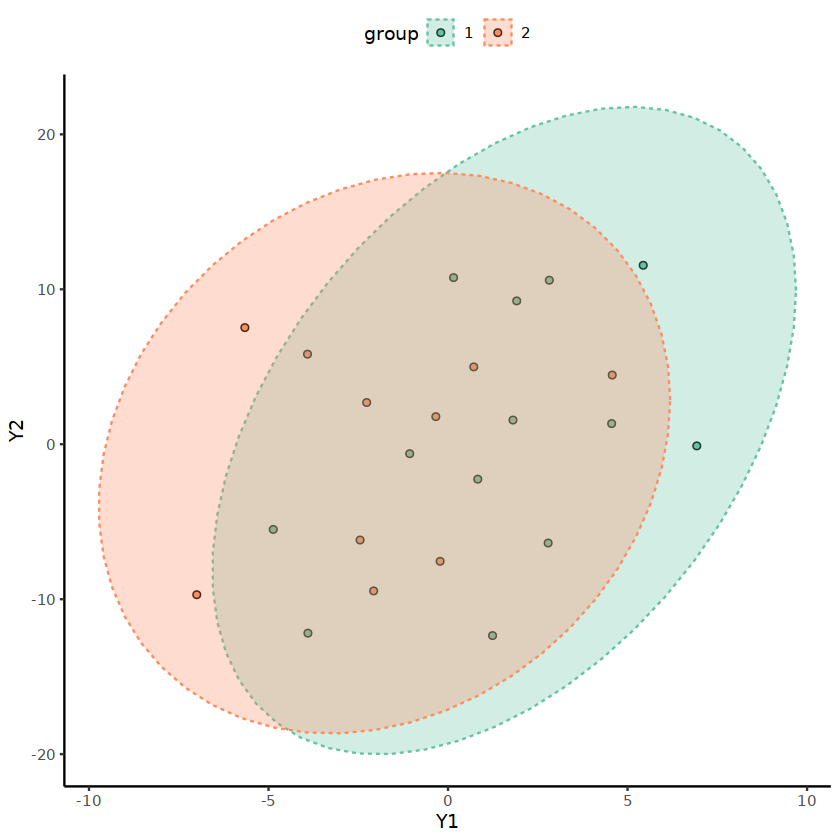

In [42]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")

In [43]:
head(cliinfo,2)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,SL32230,48,MD,F,X3004,DLPFC
2,SL32231,46,MD,M,X3064,DLPFC


In [44]:
ds = expr %>%  tibble::rownames_to_column(.,'sample')

In [45]:
dss = merge(cliinfo,ds,by.x = 'V1',by.y = 'sample')

In [46]:
dim(pdat)

[1] 23  3

In [47]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [48]:
head(pdat1,2)

,sample,Y1,Y2,group
,<chr>,<dbl>,<dbl>,<fct>
1,SL32230,5.436126,11.549882,1
2,SL32231,4.572867,4.465455,2


In [49]:
bulk1.group = pdat1[,c(1,4)]

In [50]:
write.csv(bulk1.group,file = 'bulk1.group.csv',row.names =F)

In [51]:
dim(bulk1.group)

[1] 23  2

In [52]:
expr1  =dss

Loading required package: cowplot

Warning message:
"package 'cowplot' was built under R version 4.2.3"
Loading required package: ggsci

Warning message:
"package 'ggsci' was built under R version 4.2.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.2.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




,V3,gene,Expression
,<chr>,<chr>,<dbl>
1,MD,RPE65,0.92486629
2,MD,RPE65,0.07712643


gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
RPE65,Expression,MD,Control,0.245769112,0.7400,0.2458,ns,T-test
DRD3,Expression,MD,Control,0.609767876,1.0000,0.6098,ns,T-test
MC3R,Expression,MD,Control,0.553585789,1.0000,0.5536,ns,T-test
RELB,Expression,MD,Control,0.096021930,0.3800,0.0960,ns,T-test
PRF1,Expression,MD,Control,0.001830015,0.0092,0.0018,**,T-test


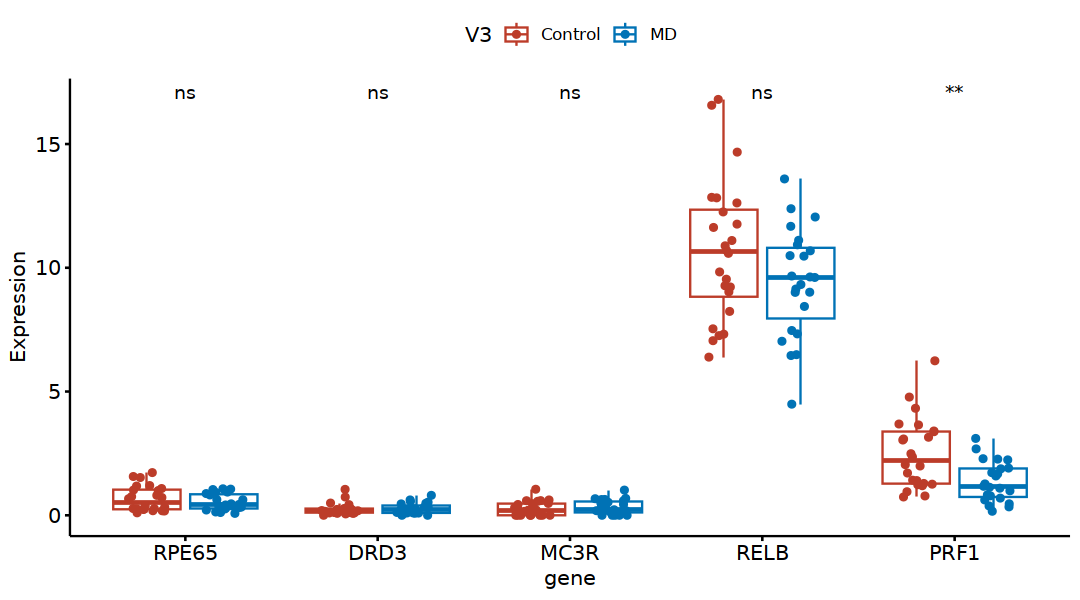

In [53]:
mydata<-expr1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",RPE65:PRF1) %>% 
  ##
  dplyr::select(V3,gene,Expression) 

require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

head(mydata,2)

compare_means( Expression ~ V3, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "V3", y = "Expression",
          color = "V3", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "V3", palette = "nejm",
          add = "jitter")

diffgene = as.data.frame(compare_means( Expression ~ V3, data = mydata, method = 't.test',
              group.by = "gene"))

diffgene = rownames(diffgene) = diffgene[,1]

write.csv(diffgene,file = 'diffgene3.bulk1.csv')

options(repr.plot.height = 5,repr.plot.width = 9)
p + stat_compare_means(aes(group = V3), label = "p.signif",method = 't.test')

,V4,gene,Expression
,<chr>,<chr>,<dbl>
1,F,RPE65,0.92486629
2,M,RPE65,0.07712643


gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
RPE65,Expression,F,M,0.36861391,1.00,0.369,ns,T-test
DRD3,Expression,F,M,0.36346846,1.00,0.363,ns,T-test
MC3R,Expression,F,M,0.72370540,1.00,0.724,ns,T-test
RELB,Expression,F,M,0.69894454,1.00,0.699,ns,T-test
PRF1,Expression,F,M,0.07545879,0.38,0.075,ns,T-test


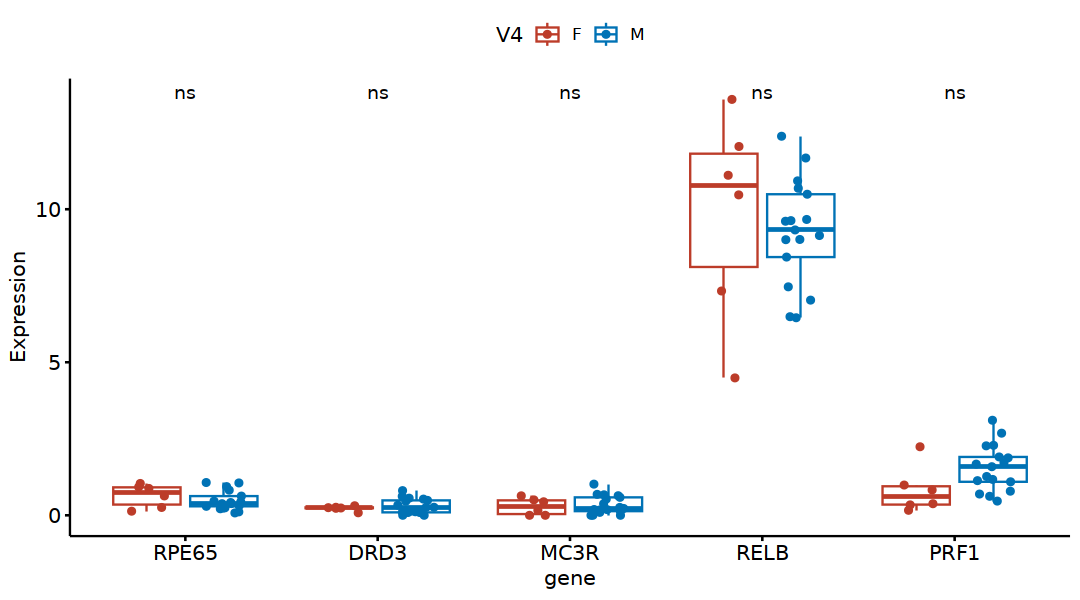

In [54]:
mydata<-expr1 %>%  dplyr::filter(V3 == 'MD')%>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",RPE65:PRF1) %>% 
  ##
  dplyr::select(V4,gene,Expression) 

require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

head(mydata,2)

compare_means( Expression ~ V4, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "V4", y = "Expression",
          color = "V4", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "V4", palette = "nejm",
          add = "jitter")

diffgene = as.data.frame(compare_means( Expression ~ V4, data = mydata, method = 't.test',
              group.by = "gene"))

diffgene = rownames(diffgene) = diffgene[,1]

write.csv(diffgene,file = 'diffgene3.bulk1.sex.csv')

options(repr.plot.height = 5,repr.plot.width = 9)
p + stat_compare_means(aes(group = V4), label = "p.signif",method = 't.test')

In [55]:
table(expr1$V2)


19 24 28 32 35 39 40 41 43 44 45 46 47 48 49 50 52 53 55 56 58 63 64 65 66 67 
 2  1  1  2  1  4  3  1  1  2  2  3  1  2  3  1  1  1  1  2  2  2  1  1  2  1 
70 72 
 2  1 

In [56]:
expr1$V2 = ifelse( expr1$V2> 60 ,'old','young')

,V2,gene,Expression
,<chr>,<chr>,<dbl>
1,young,RPE65,0.92486629
2,young,RPE65,0.07712643


gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
RPE65,Expression,young,old,0.003782064,0.019,0.0038,**,T-test
DRD3,Expression,young,old,0.922181764,1.000,0.9222,ns,T-test
MC3R,Expression,young,old,0.943400117,1.000,0.9434,ns,T-test
RELB,Expression,young,old,0.670676857,1.000,0.6707,ns,T-test
PRF1,Expression,young,old,0.830827206,1.000,0.8308,ns,T-test


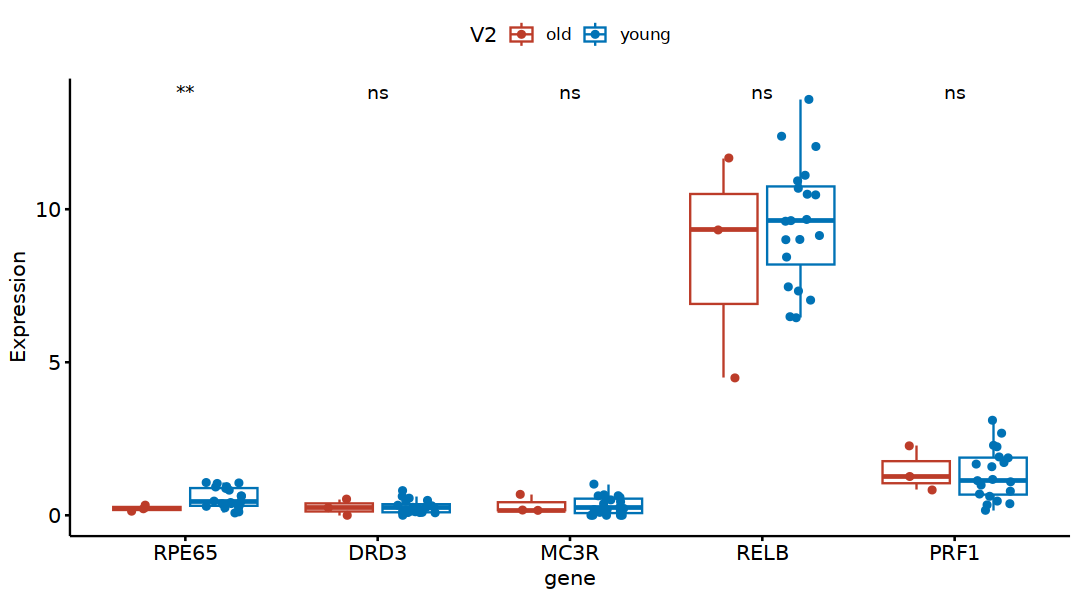

In [57]:
mydata<-expr1 %>%  dplyr::filter(V3 == 'MD')%>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",RPE65:PRF1) %>% 
  ##
  dplyr::select(V2,gene,Expression) 

require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

head(mydata,2)

compare_means( Expression ~ V2, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "V2", y = "Expression",
          color = "V2", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "V2", palette = "nejm",
          add = "jitter")

diffgene = as.data.frame(compare_means( Expression ~ V2, data = mydata, method = 't.test',
              group.by = "gene"))

diffgene = rownames(diffgene) = diffgene[,1]

write.csv(diffgene,file = 'diffgene3.bulk1.age.csv')

options(repr.plot.height = 5,repr.plot.width = 9)
p + stat_compare_means(aes(group = V2), label = "p.signif",method = 't.test')